Initial w: [array([[0.189, 0.797],
        [0.601, 0.048],
        [0.777, 0.752],
        [0.957, 0.902]]) array([[0.788, 0.575, 0.852, 0.818],
                                [0.637, 0.07 , 0.328, 0.452]])
 array([0.881, 0.089])]
-----------------------------
Final w: [array([[0.189, 0.797],
        [0.6  , 0.048],
        [0.777, 0.752],
        [0.957, 0.901]]) array([[0.786, 0.574, 0.851, 0.816],
                                [0.636, 0.07 , 0.327, 0.452]])
 array([0.855, 0.067])]
-----------------------------
Error: 0.000 A: 0.700


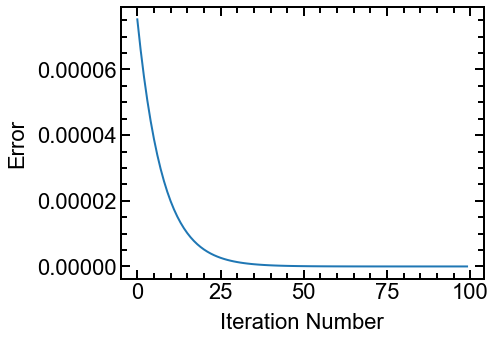

In [39]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
plt.style.use('./sci.mplstyle')
import numpy as np

# Define activation function
def sigmoid(y):
    return 1.0/(1+np.exp(-1*y))
# Define error function
def error(A, Y):
    return np.power(A-Y, 2)
# Define derivative of error function
def d_error_A(A, Y):
    return 2*(A-Y)
# Define derivative of activation function
def d_A_y(A):
    return A*(1.0-A)
# Define derivative of linear function
def d_y_w(x):
    return x
# Define the gradient of weight
def update_w(w,grad,r):
    return w-r*grad

# Input value
x = np.array([0.5, 2.4])
# Output value
Y = np.array([0.7])

# Learning rate
r = 0.5

# Number of inputs, number of neurons per each hidden layer, number of output neurons
network = np.array([x.shape[0],4,2,1])

# Initializing the weights of the entire networks
w = []
w_temp = []
for layer_counter in np.arange(network.shape[0]-1):
    for neuron_counter in np.arange(network[layer_counter + 1]):
        w_temp.append(np.random.rand(network[layer_counter]))
    w.append(np.array(w_temp))
    w_temp = []
w = np.array(w, dtype=object)
w[-1] = w[-1][0] #Last set of weights are of shape (n, 1). For simplicity, first dim is removed.
w_old = w

np.set_printoptions(precision=3)
print("Initial w:", w)
print("-----------------------------")

step = []
err_step = []
layer_idx = 0

for k in range (100):
    # Forward Pass
    # First hidden layer calculations
    y1 = np.matmul(w[layer_idx], x)
    A1 = sigmoid(y1)
    
    # Second hidden layer calculations
    layer_idx = layer_idx + 1 # =1
    y2 = np.matmul(w[layer_idx], A1)
    A2 = sigmoid(y2)
    
    # Output layer calculations
    layer_idx = layer_idx + 1 # =2
    y3 = np.sum(w[layer_idx]*A2)
    A3 = sigmoid(y3)
    err = error(A3, Y)
    
    # Backward Pass
    g1 = d_error_A(A3, Y)
    g2 = d_A_y(A3)
    g3 = d_y_w(A2)
    
    # Weights between second hidden and output layers
    grad_hidden_output = g3*g2*g1
    
    w[layer_idx] = update_w(w[layer_idx],grad_hidden_output,r)
    
    # Weights between first and second hidden layers
    g3 = d_y_w(w_old[layer_idx])
    g4 = d_A_y(A2)
    g5 = d_y_w(A1)
    
    layer_idx = layer_idx -1 # =1 
    for i in np.arange(g3.shape[0]): # neuron index of second hidden layer
        grad_hidden_input = g5*g4[i]*g3[i]*g2*g1
        w[layer_idx][i] = update_w(w[layer_idx][i],grad_hidden_input,r)
     
    # Weights between first hidden and input layers
    g6 = d_A_y(A1)
    g7 = d_y_w(x)
    
    layer_idx = layer_idx -1 # =0
    for i in np.arange(g3.shape[0]): # neuron index of second hidden layer
        g5 = d_y_w(w_old[layer_idx+1][i])
        for j in np.arange(g5.shape[0]): # neuron index of first hidden layer
            grad_hidden_input = g7*g6[j]*g5[j]*g4[i]*g3[i]*g2*g1
            w[layer_idx][j] = update_w(w[layer_idx][j],grad_hidden_input,r)
    
    w_old = w
    
    #Store results
    step.append((k))
    err_step.append((err))

print("Final w:", w)
print("-----------------------------")
print("Error: %5.3f"%err, "A: %5.3f"%A3)
    
# Create figure object
plt.figure()
# Add the x and y-axis labels
plt.xlabel('Iteration Number')
plt.ylabel('Error')
# Plot
plt.plot(step, err_step)
# Save figure
plt.savefig('ANN-2-hidden-layer.png')
plt.show()
